# kmeans 

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [271]:
data = pd.read_csv('C:/Users/PC/Desktop/data/anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv')

In [273]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [275]:
data.shape

(200, 5)

In [277]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [279]:
data = data.drop(['CustomerID'], axis = 1)
data = data.drop(['Spending Score (1-100)'], axis = 1)

In [281]:
label_encoder = preprocessing.LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [283]:
data.isna().sum()

Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64

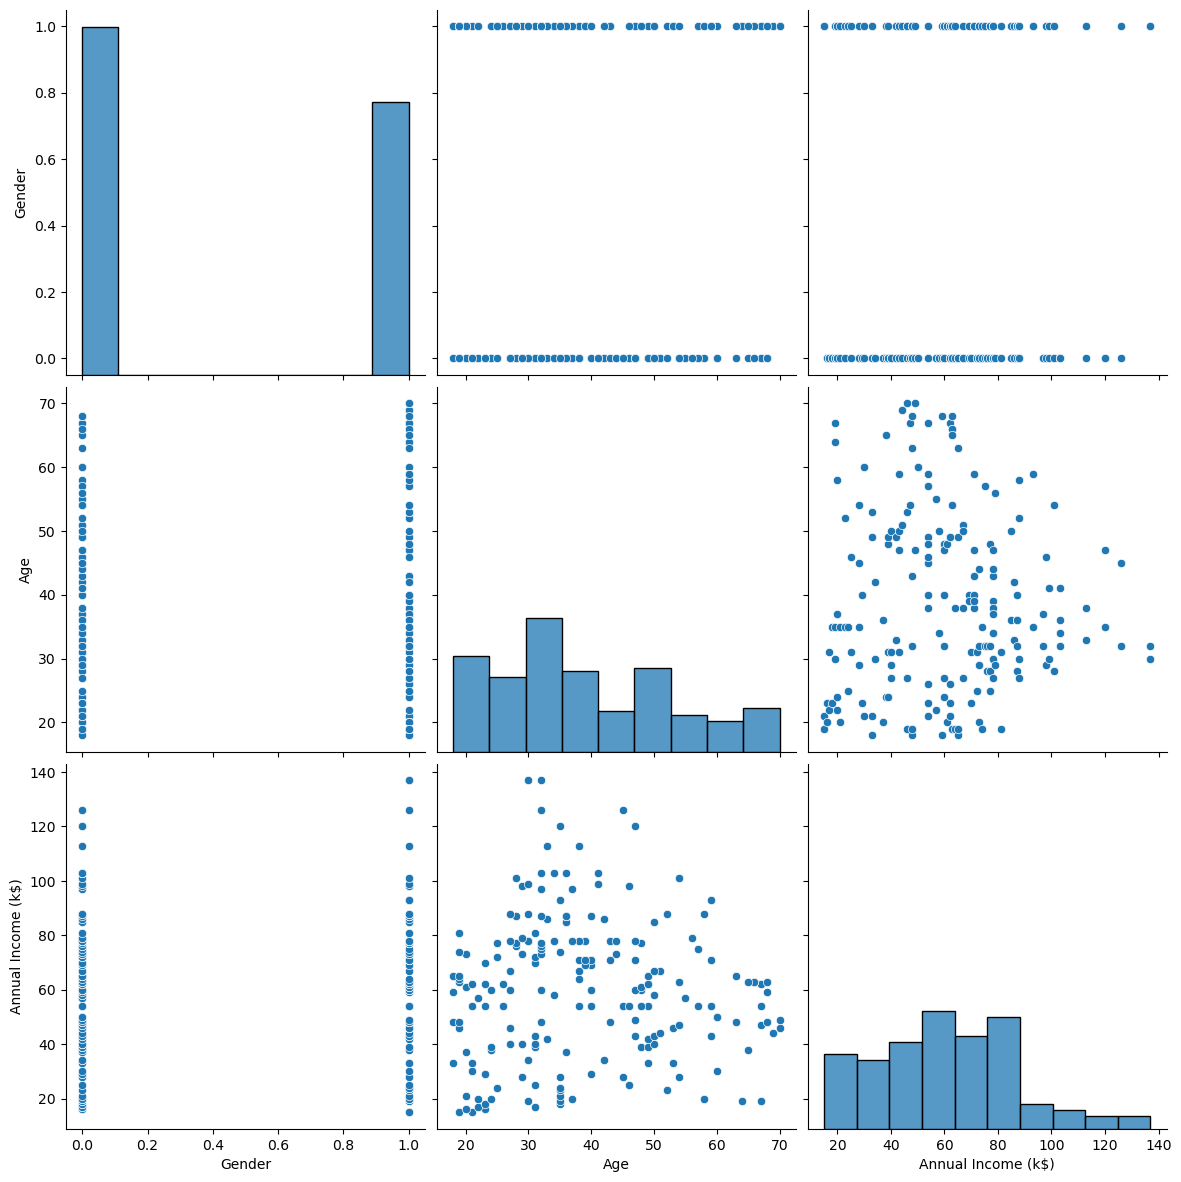

In [285]:
sns.pairplot(data.dropna(),size=4,kind='scatter')

In [286]:
data['Gender'].value_counts()


Gender
0    112
1     88
Name: count, dtype: int64

<Axes: >

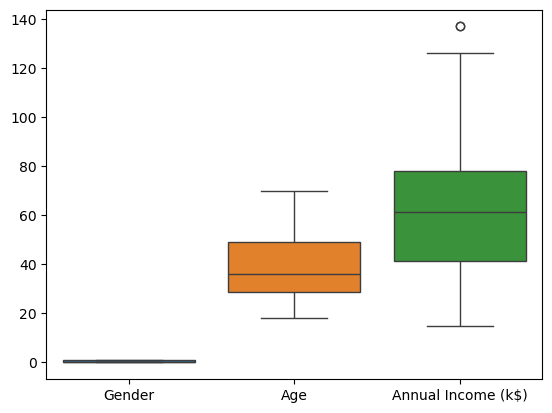

In [287]:
sns.boxplot(data=data)

In [290]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
x

,Gender,Age,Annual Income (k$)
0,1.128152,-1.424569,-1.738999
1,1.128152,-1.281035,-1.738999
2,-0.886405,-1.352802,-1.700830
3,-0.886405,-1.137502,-1.700830
4,-0.886405,-0.563369,-1.662660
...,...,...,...
195,-0.886405,-0.276302,2.268791
196,-0.886405,0.441365,2.497807
197,1.128152,-0.491602,2.497807
198,1.128152,-0.491602,2.917671


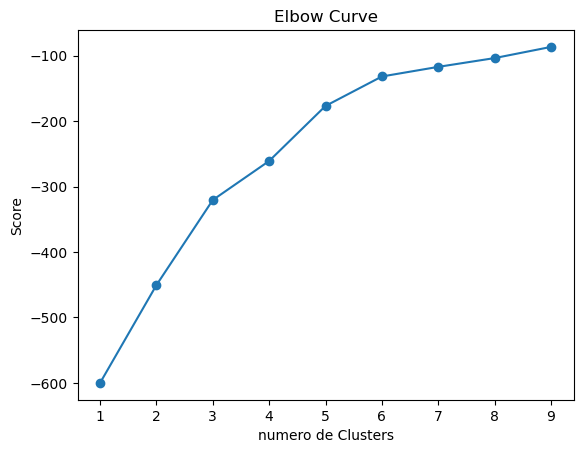

In [293]:
Nc = range(1,10)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score,marker='o')
plt.xlabel('numero de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [295]:
kmeans=KMeans(n_clusters=8).fit(x)
centroids = kmeans.cluster_centers_
centroids

array([[-0.88640526,  1.03871729, -0.36265448],
       [-0.88640526, -0.72019202, -1.17776722],
       [ 1.12815215, -0.31617214,  0.96042766],
       [-0.88640526,  0.04664835,  1.69897582],
       [ 1.12815215,  1.16620871, -0.97942755],
       [-0.88640526, -0.60991988,  0.39848884],
       [ 1.12815215,  1.5816581 ,  0.01679455],
       [ 1.12815215, -0.94612419, -0.81180014]])

In [296]:
# Obtenemos las etiquetas  para cada punto de  nuestros datos 
labels = kmeans.labels_
#obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan','blue','black','orange','pink','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

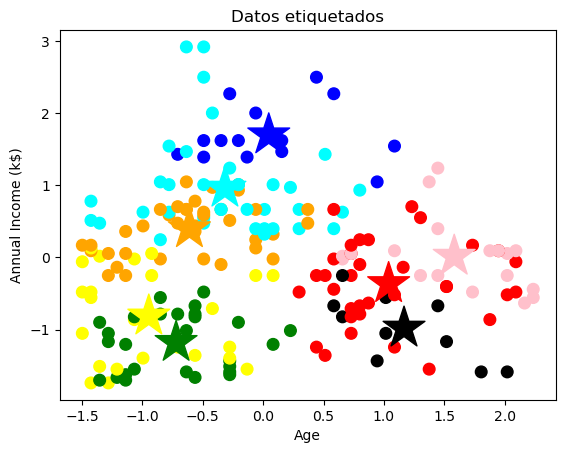

In [297]:
f1 = x['Age'].values
f2 =x['Annual Income (k$)'].values
plt.scatter(f1,f2,c=asignar, s=70)
plt.scatter(C[:, 1],C[:, 2],marker='*',c=colores,s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

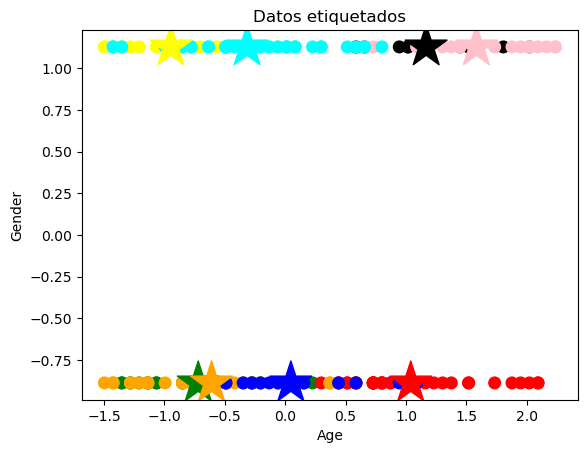

In [298]:
f1 = x['Age'].values
f2 =x['Gender'].values
plt.scatter(f1,f2,c=asignar, s=70)
plt.scatter(C[:, 1],C[:, 0],marker='*',c=colores,s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

In [302]:
x_new = scaler.fit_transform(np.array([[2,0.8,2.2]]))
new_label = kmeans.predict(x_new)
color=[]
for row in new_label:
    color.append(colores[row])
print(new_label)
print(color)

[5]
['orange']


In [307]:
print("Medidas de  calidad para k-means 8 cluster: ")
print("puntaje de silueta: " , metrics.silhouette_score(x,labels))
print("Indice de calinsku-Harabasz: " , metrics.calinski_harabasz_score(x,labels))
print("inertia (suma de cuadrados dentro de los clusteres uwu ): " , kmeans.inertia_)
print("Davies-bouldin Index: ", metrics.davies_bouldin_score(x,labels))


Medidas de  calidad para k-means 8 cluster: 
puntaje de silueta:  0.397339954265435
Indice de calinsku-Harabasz:  129.3468841935178
inertia (suma de cuadrados dentro de los clusteres uwu ):  104.97269991556055
Davies-bouldin Index:  0.8598129858521832


# 6 cluster 
* Medidas de  calidad para k-means: 
* puntaje de silueta:  0.42592811982856543
* Indice de calinsku-Harabasz:  139.34455020128098
* inertia (suma de cuadrados dentro de los clusteres uwu ):  130.6803939480412
* Davies-bouldin Index:  0.77534448572725